### Домашня работа 2.
### Логистическая регрессия. Работа с признаками


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов. Можно получить 4.5 бонусных балла.

Неэффективная реализация кода может негативно отразиться на оценке.

In [ ]:
print('Всем удачи!👒 Тут она точно пригодится.')

Всем удачи!👒 Тут она точно пригодится.


In [ ]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Логистическая регрессия своими руками (4 балла)

Реализуйте логистическую регрессию, обучаемую с помощью:

**Задание 1 (1.5 балла). Градиентного спуска**

**Задание 2 (1.5 балла). Стохастического градиентного спуска**

Во всех пунктах необходимо соблюдать следующие условия:
- Градиентный спуск необходимо записать в векторном виде
- Циклы средствами python допускается использовать только для итераций градиентного спуска;
- В качестве критерия останова необходимо использовать (одновременно):

        проверку на евклидову норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) задаваемого параметром `tolerance`;


        достижение максимального числа итераций (например, 10000), задаваемого параметром `max_iter`.

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса loss_history. В нём после вызова метода fit должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту);

Инициализировать веса можно случайным образом или нулевым вектором.

Полезно [почитать](https://scikit-learn.org/stable/developers/develop.html).

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, gd_type='stochastic',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) — init weights
        eta: learning rate
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration

    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        self.loss_history = []
        if self.w is None:
          self.w = self.w0.copy()
        last_w = self.w.copy()
        if self.gd_type == 'stochastic':
          len_X = len(X)
          for i in range(self.max_iter):
            index = np.random.randint(len_X)
            X_index = X.loc[[index]]
            y_index = y[[index]]
            self.w -= self.eta*self.calc_gradient(X_index, y_index)
            self.loss_history.append(self.calc_loss(X_index, y_index))
            if (((self.w - last_w)**2).sum())**(1/2) < self.tolerance:
              break
            last_w = self.w.copy()
        elif self.gd_type == 'full':
          for i in range(self.max_iter):
            self.w -= self.eta*self.calc_gradient(X, y)
            self.loss_history.append(self.calc_loss(X, y))
            if (((self.w - last_w)**2).sum())**(1/2) < self.tolerance:
              break
            last_w = self.w.copy()
        return self


    def predict_proba(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return 1/(1+np.exp(-(X@self.w)))


    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return (self.predict_proba(X) > 0.5).astype(int)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (ell, d) (ell can be equal to 1 if stochastic)
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        return X.T@(self.predict_proba(X)-y)/len(y)

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float
        """
        prob = self.predict_proba(X)
        return -(y@np.log(prob) + (1-y)@np.log(1-prob))/len(y)

Синтетические данные

In [ ]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [ ]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Важно:** далее предполагается, что вы используете собственную реализацию логистической регрессии.
Если с написанием класса возникли проблемы, используйте реализацию sklearn, чтобы не терять баллы за остальные задания.

**Задание 3 (1 балл)**

Обучите логистическую регрессию на синтетических данных.

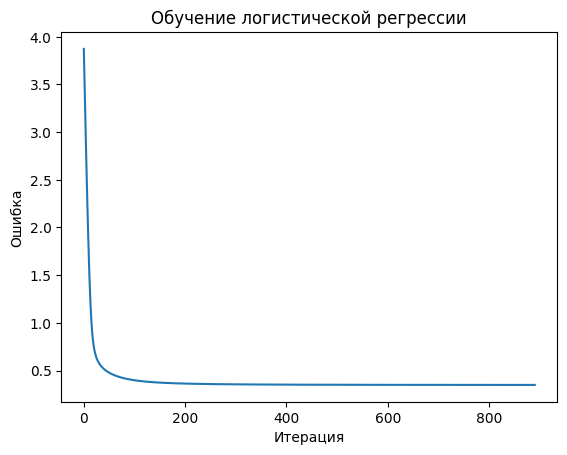

In [ ]:
import matplotlib.pyplot as plt

log_reg = LogReg(gd_type='full', tolerance=1e-4, max_iter=1000, w0=np.random.random(X_train.shape[1])-0.5, eta=1e-2)
log_reg.fit(X_train, y_train)
plt.plot(log_reg.loss_history)
plt.title('Обучение логистической регрессии')
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.show()

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые. Проинтерпретируйте результат.

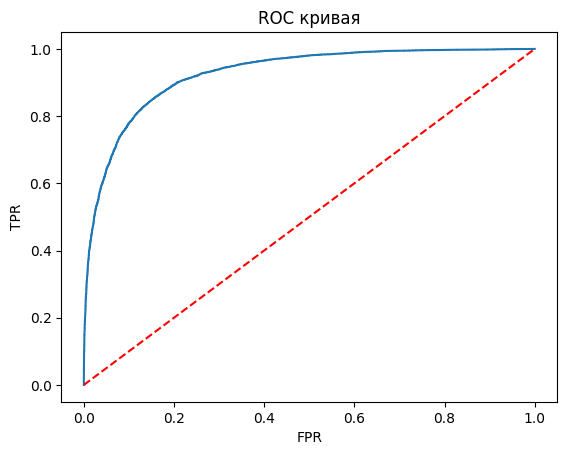

ROC-AUC: 0.9257392656333314



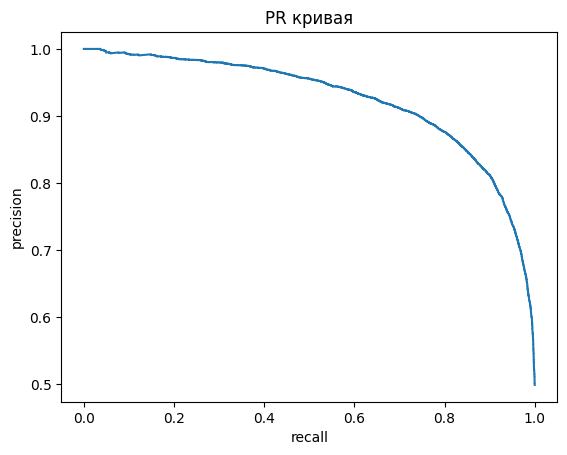

PR-AUC: 0.9241343396621559


In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

pred = log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test+1, pred, pos_label=2)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC кривая')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
print(f'ROC-AUC: {auc(fpr, tpr)}')
print()
precision, recall, thresholds = precision_recall_curve(y_test+1, pred, pos_label=2)
plt.plot(recall, precision)
plt.title('PR кривая')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()
print(f'PR-AUC: {auc(recall, precision)}')

*ROC AUC и PR AUC одинаково хорошие, так как предсказываемые классы сбалансированны. Если бы был дизбаланс классов, то метркии бы заметно отличались. Выбор ключевой метрики зависит от задачи. В среднем стоит ориентировать на ROC AUC, но при дизбалансе классов возможно стоит расмотреть PR AUC.*

## Часть 2. Работа с категориальными переменными (3 балла)

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет.

In [ ]:
!unzip train.csv

Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [ ]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

**Задание 5 (0 баллов).** Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [ ]:
%%time

from sklearn.metrics import roc_auc_score

log_reg = LogisticRegression(penalty=None, max_iter=5000)
log_reg.fit(X_train, y_train)
pred = log_reg.predict_proba(X_test)[:,1]
print(f'ROC-AUC на исходных признаках: {roc_auc_score(y_test, pred)}')

ROC-AUC на исходных признаках: 0.6251083714015606
CPU times: user 30.2 s, sys: 8.73 s, total: 39 s
Wall time: 24.2 s


**Задание 6 (0.5 балла).** Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

print(f'Количество исходных признаков: {X_train.shape[1]}')
cat_list = [column for column in X_train.columns if column[-3:] == 'cat']
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train[cat_list])
X_train_ohe = pd.concat([X_train.drop(cat_list, axis=1),
                         pd.DataFrame(ohe.transform(X_train[cat_list]), columns=ohe.get_feature_names_out())], axis=1)
X_test_ohe = pd.concat([X_test.drop(cat_list, axis=1),
                         pd.DataFrame(ohe.transform(X_test[cat_list]), columns=ohe.get_feature_names_out())], axis=1)
print(f'Количество признаков с ohe: {X_train_ohe.shape[1]}')

Количество исходных признаков: 57
Количество признаков с ohe: 212


In [ ]:
%%time

log_reg = LogisticRegression(penalty=None, max_iter=5000)
log_reg.fit(X_train_ohe, y_train)
pred = log_reg.predict_proba(X_test_ohe)[:,1]
print(f'ROC-AUC на ohe признаках: {roc_auc_score(y_test, pred)}')

ROC-AUC на ohe признаках: 0.6328296711127472
CPU times: user 1min 37s, sys: 12.6 s, total: 1min 49s
Wall time: 1min 4s


*Качество модели выросло на 0.007 по ROC-AUC, количество признаков увеличилсоь в 4 раза, время обучения выросло в 2 раза*

Как можно было заменить, one-hot-кодирование сильно увилечивает количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 7 (1.5 балла).__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше, без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментом. Заметили ли вы что-то интересное?


In [ ]:
X_train_te = X_train.copy()
X_test_te = X_test.copy()
for cat in cat_list:
  mean_target_dict = {val:y_train[X_train[cat]==val].mean() for val in X_train[cat].unique()}
  X_train_te[cat] = X_train[cat].apply(lambda val: mean_target_dict[val])
  X_test_te[cat] = X_train[cat].apply(lambda val: mean_target_dict[val])

In [ ]:
%%time

log_reg = LogisticRegression(penalty=None, max_iter=5000)
log_reg.fit(X_train_te, y_train)
pred = log_reg.predict_proba(X_test_te)[:,1]
print(f'ROC-AUC на счётчиках: {roc_auc_score(y_test, pred)}')

ROC-AUC на счётчиках: 0.5776829491186344
CPU times: user 49.1 s, sys: 14.1 s, total: 1min 3s
Wall time: 38.6 s


*Время обучения в 2 раза меньше, так как в 4 раза меньше признаков, весов. Интересное: качество модели заметно упало, так как модель переобучилась на счётчиках*

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо так, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки.

__Задание 8 (1 балл)__. Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.


In [ ]:
X_train_te_noise = X_train.copy()
X_test_te_noise = X_test.copy()
for cat in cat_list:
  mean_target_dict = {val:y_train[X_train[cat]==val].mean()+(np.random.rand()-0.5)*1 for val in X_train[cat].unique()}
  X_train_te_noise[cat] = X_train[cat].apply(lambda val: mean_target_dict[val])
  X_test_te_noise[cat] = X_train[cat].apply(lambda val: mean_target_dict[val])

In [ ]:
log_reg = LogisticRegression(penalty=None, max_iter=5000)
log_reg.fit(X_train_te_noise, y_train)
pred = log_reg.predict_proba(X_test_te_noise)[:,1]
print(f'ROC-AUC на счётчиках с шумом: {roc_auc_score(y_test, pred)}')

ROC-AUC на счётчиках с шумом: 0.5994014246313806


*Качество заметно хуже по сравнению с изначальной моделью при разных параметрах шума, при низком шуме следует переобучение, при высоком шуме теряется информация признаков, значит этот тип кодирования не подходит для данной задачи*

## Часть 3. Отбор признаков (3 балла + 1 бонус)

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом они увеличивают время вычислений) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [ ]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [ ]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [ ]:
print(f'Количество исходных признаков: {X_train.shape[1]}')
cat_list = [column for column in X_train.columns if column[-3:] == 'cat']
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train[cat_list])
X_train = pd.concat([X_train.drop(cat_list, axis=1),
                         pd.DataFrame(ohe.transform(X_train[cat_list]), columns=ohe.get_feature_names_out())], axis=1)
X_test = pd.concat([X_test.drop(cat_list, axis=1),
                         pd.DataFrame(ohe.transform(X_test[cat_list]), columns=ohe.get_feature_names_out())], axis=1)
print(f'Количество признаков с ohe: {X_train.shape[1]}')

Количество исходных признаков: 57
Количество признаков с ohe: 213


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [ ]:
%%time

log_reg = LogisticRegression(penalty=None, max_iter=5000)
log_reg.fit(X_train, y_train)
pred = log_reg.predict_proba(X_test)[:,1]
print(f'ROC-AUC: {roc_auc_score(y_test, pred)}')

ROC-AUC: 0.6378843906294456
CPU times: user 6min 34s, sys: 49.4 s, total: 7min 23s
Wall time: 5min 16s


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 10 (1 балл).__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?

In [ ]:
%%time

strong_feature_list = X_train.columns[[abs(coef)>sorted(abs(log_reg.coef_[0]), reverse=True)[200] for coef in log_reg.coef_[0]]]
len(strong_feature_list)

CPU times: user 23.1 ms, sys: 14.5 ms, total: 37.6 ms
Wall time: 19.5 ms


200

In [ ]:
log_reg = LogisticRegression(penalty=None, max_iter=5000)
log_reg.fit(X_train[strong_feature_list], y_train)
pred = log_reg.predict_proba(X_test[strong_feature_list])[:,1]
print(f'ROC-AUC: {roc_auc_score(y_test, pred)}')

ROC-AUC: 0.6379779950511038


*Скорость такого отбора признаков складывается из времени обучения модели на всех признаках и времени отбора: 5мин 16с + 0.02с. Качество выросло, но слабо, метрика ROC-AUC увеличилась всего на 0.0001*

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки.

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [ ]:
log_reg = LogisticRegression(penalty=None, max_iter=5000)
log_reg.fit(X_train_norm, y_train)
pred = log_reg.predict_proba(X_test_norm)[:,1]
print(f'ROC-AUC: {roc_auc_score(y_test, pred)}')

ROC-AUC: 0.638060837213553


In [ ]:
strong_feature_list = X_train_norm.columns[[abs(coef)>sorted(abs(log_reg.coef_[0]), reverse=True)[200] for coef in log_reg.coef_[0]]]
len(strong_feature_list)

200

In [ ]:
log_reg = LogisticRegression(penalty=None, max_iter=5000)
log_reg.fit(X_train_norm[strong_feature_list], y_train)
pred = log_reg.predict_proba(X_test_norm[strong_feature_list])[:,1]
print(f'ROC-AUC: {roc_auc_score(y_test, pred)}')

ROC-AUC: 0.638092220243827


*Качество выросло, но тоже слабо, ещё на 0.0001 по ROC-AUC*

__Задание 10 (0.5 балла).__
Можно задать отбор признаков более функционально. Вспомним, что L1-регуляризация также умеет отбирать признаки. Понятно, что теперь нам будет сложнее оставить именно 200 лучших признаков, но возможно они нам и не нужны. Подберите коэффициент регуляризации и проверьте, как изменилось качество. Получилось ли добиться лучшего качества при менее чем 200 признаках?

In [ ]:
log_reg = LogisticRegression(penalty='l1', max_iter=200, C=0.01, solver='saga')
log_reg.fit(X_train_norm, y_train)
pred = log_reg.predict_proba(X_test_norm)[:,1]
print(f'ROC-AUC: {roc_auc_score(y_test, pred)}')

ROC-AUC: 0.6384288197348855


In [ ]:
strong_feature_list = X_train_norm.columns[[coef!=0 for coef in log_reg.coef_[0]]]
len(strong_feature_list)

129

In [ ]:
log_reg = LogisticRegression(penalty=None, max_iter=5000)
log_reg.fit(X_train_norm[strong_feature_list], y_train)
pred = log_reg.predict_proba(X_test_norm[strong_feature_list])[:,1]
print(f'ROC-AUC: {roc_auc_score(y_test, pred)}')

ROC-AUC: 0.6375801182618771


In [ ]:
log_reg = LogisticRegression(penalty='l1', max_iter=200, C=0.001, solver='saga')
log_reg.fit(X_train_norm, y_train)
pred = log_reg.predict_proba(X_test_norm)[:,1]
print(f'ROC-AUC: {roc_auc_score(y_test, pred)}')

ROC-AUC: 0.628911755933861


In [ ]:
strong_feature_list = X_train_norm.columns[[coef!=0 for coef in log_reg.coef_[0]]]
len(strong_feature_list)

16

In [ ]:
log_reg = LogisticRegression(penalty=None, max_iter=5000)
log_reg.fit(X_train_norm[strong_feature_list], y_train)
pred = log_reg.predict_proba(X_test_norm[strong_feature_list])[:,1]
print(f'ROC-AUC: {roc_auc_score(y_test, pred)}')

ROC-AUC: 0.6302621622596792


*При переборе коэффициента регуляризации выяснилось, что при менее чем 200 признаках качество падает, значит всё таки какая-то полезная информация в отброшенных признаках содержится. Интересно, что при l1 регуляризации всего на 200 эпохах модель для отбора признаков показала заметно лучшее качество, значит для нашей задаче имело бы смысл использовать регуляризацию. Так же интересно, что модель не сильно хуже предсказывает всего и на 16 признаках, что существенно сокращает время обучения и расходы на память, следовательно так действительно можно выделять главные признаки.*

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods.

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $mu$, $sigma$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

__Задание 11 (1 балл)__. Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случаев.

In [ ]:
def get_t(pos_array, neg_array):
  return abs(pos_array.mean() - neg_array.mean())/(
            np.sqrt((len(pos_array)*(np.std(pos_array)**2) + len(neg_array)*(np.std(neg_array)**2))/(
                len(pos_array) + len(neg_array))))

In [ ]:
%%time

X_train_pos = X_train[y_train==1]
X_train_neg = X_train[y_train==0]
t_values = np.array([get_t(X_train_pos[col].values, X_train_neg[col].values) for col in X_train.columns])
strong_feature_list = X_train.columns[[t_val>sorted(t_values, reverse=True)[200] for t_val in t_values]]
len(strong_feature_list)

CPU times: user 692 ms, sys: 192 ms, total: 884 ms
Wall time: 869 ms


200

In [ ]:
log_reg = LogisticRegression(penalty=None, max_iter=5000)
log_reg.fit(X_train[strong_feature_list], y_train)
pred = log_reg.predict_proba(X_test[strong_feature_list])[:,1]
print(f'ROC-AUC: {roc_auc_score(y_test, pred)}')

ROC-AUC: 0.6380877801814991


*Скорость такого отбора признаков гораздо выше, так как нам не нужно обучать никакую модель. При этом качество не упало по сравнению с отбором встроенными методами.*

### Методы-обёртки

__Задание 12 (бонус, 1 балл)__.


Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо.

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [ ]:
%%time

from tqdm import tqdm
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

#  Будем отбирать признаки по тренировочной выборке размером 10_000 и валидационной размером 10_000
X_col_s = X_train.copy()
X_col_s['target'] = y_train
X_col_s, _ = train_test_split(X_col_s,
                              train_size=20_000,
                              stratify=X_col_s['target'].values,
                              random_state=42)
X_train_col_s, X_val_col_s, y_train_col_s, y_val_col_s = train_test_split(
                                               X_col_s.drop('target', axis=1),
                                               X_col_s['target'].values,
                                               train_size=10_000,
                                               stratify=X_col_s['target'].values,
                                               random_state=42)

cols = X_train_col_s.columns.tolist()
log_reg = LogisticRegression(penalty=None, max_iter=20)
log_reg.fit(X_train_col_s[cols], y_train_col_s)
pred = log_reg.predict_proba(X_val_col_s[cols])[:,1]
score = roc_auc_score(y_val_col_s, pred)
print(f'Количество признаков: {len(cols)}, метрика с ними: {score}')
for _ in range(len(cols)):  # отбрасываем признаки по одному
  score_best = 0
  cols_best = []
  for i in tqdm(range(len(cols))):  # проходимся по всем признакам в поисках лучшего исключения
    cols_new = cols[:i] + cols[i+1:]
    log_reg = LogisticRegression(penalty=None, max_iter=20)
    log_reg.fit(X_train_col_s[cols_new], y_train_col_s)
    pred = log_reg.predict_proba(X_val_col_s[cols_new])[:,1]
    score_new = roc_auc_score(y_val_col_s, pred)
    if score_new>score_best:
      score_best = score_new
      cols_best = cols_new
  print(f'Количество признаков: {len(cols_best)}, метрика с ними: {score_best}')
  if score_best<=score or len(cols_best)<200:
    break
  else:
    score = score_best
    cols = cols_best
strong_feature_list = cols.copy()
print(f'Количество признаков: {len(strong_feature_list)}, метрика с ними: {score}')

Количество признаков: 213, метрика с ними: 0.5854068002644468


100%|██████████| 213/213 [00:39<00:00,  5.46it/s]


Количество признаков: 212, метрика с ними: 0.5963344257167433


100%|██████████| 212/212 [00:52<00:00,  4.00it/s]


Количество признаков: 211, метрика с ними: 0.6009827185418459


100%|██████████| 211/211 [00:44<00:00,  4.74it/s]


Количество признаков: 210, метрика с ними: 0.6032450185183869


100%|██████████| 210/210 [00:39<00:00,  5.38it/s]


Количество признаков: 209, метрика с ними: 0.6053204996054624


100%|██████████| 209/209 [00:42<00:00,  4.88it/s]


Количество признаков: 208, метрика с ними: 0.6057925229791499


100%|██████████| 208/208 [00:51<00:00,  4.03it/s]


Количество признаков: 207, метрика с ними: 0.6059722330828672


100%|██████████| 207/207 [00:50<00:00,  4.09it/s]


Количество признаков: 206, метрика с ними: 0.6061485309694251


100%|██████████| 206/206 [00:46<00:00,  4.40it/s]


Количество признаков: 205, метрика с ними: 0.6062989528758593


100%|██████████| 205/205 [00:42<00:00,  4.80it/s]


Количество признаков: 204, метрика с ними: 0.6063706094362022


100%|██████████| 204/204 [00:33<00:00,  6.05it/s]


Количество признаков: 203, метрика с ними: 0.6064573366223316


100%|██████████| 203/203 [00:44<00:00,  4.59it/s]


Количество признаков: 202, метрика с ними: 0.6065213156940663


100%|██████████| 202/202 [00:49<00:00,  4.11it/s]


Количество признаков: 201, метрика с ними: 0.6065665275714255


100%|██████████| 201/201 [00:38<00:00,  5.26it/s]


Количество признаков: 200, метрика с ними: 0.6066228291545521


100%|██████████| 200/200 [00:50<00:00,  3.95it/s]

Количество признаков: 199, метрика с ними: 0.6066597948404433
Количество признаков: 200, метрика с ними: 0.6066228291545521
CPU times: user 9min 54s, sys: 4min 9s, total: 14min 4s
Wall time: 10min 28s


In [ ]:
log_reg = LogisticRegression(penalty=None, max_iter=5000)
log_reg.fit(X_train[strong_feature_list], y_train)
pred = log_reg.predict_proba(X_test[strong_feature_list])[:,1]
print(f'ROC-AUC: {roc_auc_score(y_test, pred)}')

ROC-AUC: 0.6359851131185662


*Жадный метод отбора признаков оказался самым долгим, при этом так как пришлось использовать всего 10_000 примеров из обучающей выборки, то результаты на тестовой выборке оказались не самыми лучшими*

Опционально (это не оценивается) можете рассмотреть более интересные стратегии отбора, чем жадная. Например, генетические алгоритмы. Можно закодировать бинарным вектором, включаем мы или нет тот или иной признак в модель. А дальше генетическим алгоритмом оптимизировать этот вектор. Всё ещё не быстро, но точно быстрее жадного.


**Задание 13 (0.5 балла)** Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству? Если не делали бонус — сравните встроенный метод и метод фильтрации.

**Ответ:** ...

*Было расмотрено 3 способа отбора признаков: встроенный метод, фильтр и жадный метод. Самым быстрым оказалось использование фильтра, так как мы не обучали никакую модель, самым долгим оказался жадный метод, он настолько требовательный к ресурсам, что пришлось урезать тренировочную выборку, и из-за этого конечный список признаков оказался не лучшим. Лучшим по качеству же оказался встроенный метод, где мы выбирали признаки с наибольшими коэффициентами по модулю из обученной логистической регрессии на нормализованных данных. Но по совокупности затраченного времени на отбор и конечного качества, лидером для этой задачи будет фильтр, так как качество отличается едва заметно, зато скорость на порядки. Но стоит понимать, что фильтрами резонно выбирать параметры для линейных моделей, а вот для нелинейных уже под вопросом.*